# From Linear Algebra to Linear Regression

## Linear Algebra

It is a branch of mathematics concerning linear equations such as:
$$ a_1x_1 +  \dots + a_nx_n $$
linear maps such as:
$$ (x_1,\dots,x_n) \mapsto a_1x_1 + \dots + a_nx_n $$
and their represenations in vector spaces through matrices such as:
\begin{bmatrix}
a_11 & a_12 & a_13\\
a_21 & a_22 & a_23\\
\vdots & \vdots & \vdots\\
a_m1 & a_m2 & a_m3
\end{bmatrix}

### Design Matrix

A _design matrix_ (often denoted as $X$) is a fundamental concept in statistics and machine learning, particularly in the context of linear regression and other linear models.  It is a matrix that organizes the data in a way that facilitates the application of linear models.

#### Key Components of a Design Matrix

1. Rows: Each row in the design matrix represents a single observation or data point.
2. Columns: Each column represents a feature or predictor variable.  The columns may include:
- Independent Variables: The features used to predict the dependent variable.
- Intercept Term: A column of ones(if included)to account for the intercept term in the linear model.
- Interaction Terms: Columns representing interactions between features.
- Polynomial Terms: Columns representing higher-order terms of the features.

#### Structure of a Design Matrix

For a dataset with $n$ observations and $p$ features, the design matrix $X$ is an $n\times(p+1)$ matrix (if an intercept term is included).  The structure is as follows:

$$
X=
\begin{bmatrix}
1&x{11}&x{12}&\dots&x{1p}\\
1&x{21}&x{22}&\dots&x{2p}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x{n1}&x{n2}&\dots&x{np}\\
\end{bmatrix}
$$

- The first column(all ones)represents the intercept term.
- The remaining columns represent the features $x{ij}$, where $i$ is the observation index and $j$ is the feature index.

#### Example

Consider a simple dataset with 3 observations and 2 features(`Length`and`Width`):

| Observation |	 Length  |	 Width |
|-------------|----------|---------|
| 1           |	 1       |	 2     |	
| 2           |	 2       |	 3     |	
| 3           |	 3       |	 4     |	



The design matrix\(X\)(including an intercept term)would be:

$$
X=
\begin{bmatrix}
1&1&2\\
1&2&3\\
1&3&4\\
\end{bmatrix}
$$


#### Importance of the Design Matrix

1. Linear Regression: In linear regression,the design matrix $X$ is used to compute the model coefficients $\beta$ using the formula:
    $\hat{\beta}=(X^T X)^{-1}X^T y$ where $y$ is the vector of dependent variable values.
2. Generalized Linear Models(GLMs): The design matrix is also used in GLMs, where it helps transform the linear predictor into the response variable through a link function.
3. Feature Engineering: The design matrix can include polynomial terms, interaction terms,and other transformations of the original features to capture more complex relationships.
4. Model Interpretation: The columns of the design matrix correspond directly to the features in the model, making it easier to interpret the coefficients.

#### Example

```python
import numpy as np
import pandas as pd

# Sample data
data = {
    'Length1': [1, 2, 3],
    'Width': [2, 3, 4]
}

df = pd.DataFrame(data)

# Add an intercept term (column of ones)
df['Intercept'] = 1

# Create the design matrix
X = df[['Intercept', 'Length1', 'Width']]

print("Design Matrix:\n", X)
```

#### Output

```
Design Matrix:
   Intercept  Length1  Width
0          1        1      2
1          1        2      3
2          1        3      4
```



#### Summary
- A design matrix is a structured representation of the data used in linear models.
- It includes columns for the intercept term,independent variables,and possibly interaction or polynomial terms.
- It is essential for fitting linear regression models and other linear models,as well as for interpreting the results.

## Linear Regression
Regression is a staticall method used to model and analyze the relationship between a dependen variable (target) and one of more independent variables (predictors).

Linear regression is a technique used to determine the best-fitting line (or hyperplaine for multiple variables) that descries the relationship between independent variables and the dependent variable.  The goal is to minimize the difference (error) between the actual and the predicted values.

A __simple linear regression__ is represented as:

$$ y = \beta_0 + \beta_1x + \epsilon $$

Where:

- y is athe dependent variable (target)
- x is the independent variable (predictor)
- $\beta_0$ is the y-intercept (see below)
- $\beta_1$ is the slope (coefficient - see below)
- $\epsilon$ is the error term

For __multiple linear regression__, the equation extends to:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon $$

Where multiple independent variables (x_1, x_2, $\dots$, x_n) influence the dependent variable.

The __goal of linear regression__ is to estimate the coefficients (\beta) in such a way that the sum of squared errors (differences between actual and predicted values) is minimized, which is often done using __Ordinary Least Squares (OLS).__

### Intercept and Coefficient

In a Linear Regression model, the intercept and coefficients are fundamental components that define the linear relationship.

### Intercept ($\beta_0$ or bias)
   - It is the value of the dependent variable $(y)$ when all the independent varialbes $(x)$ are *zero*
   - It represents the starting point ($x=0$ of the regression line on the $y-axis$
   - It can be obtained from the model object: $model.intercept\_$

#### Example

Suppose we model house prices (y) based on the size of the house (x):

$ price = 50,000 + 200 \times size $

Where: 50,000 is the intercept, meaning when the house is of size zero, the land costs $50,000

  
### Coefficient ($\beta_1, \beta_2$ or weight)

   - It is the _slope_ which represents the change in the dependent variable $(y)$ for a one-unit change in the independent variable $(x)$, assuming all the other variables remain constant.
   - It can be obtained from the model object: $model.coef\_$)
   - $(x)$ is called a feature in machine learning

Given:

$ y = model.intercept\_ + (model.coef_0 \times Feature1) + (model.coef_1 \times Feature2) $

Where:
- $y$ is the prediction
  
When:
- $intercept$ = 2
- $coefficient_0$ = 3
- $coefficient_1$ = 4

Then:
- When all features are 0, prediction = 2, which is the intercept or $\beta_0$ or bias
- For each unit increase in Feature1, prediction (y) increases by 3
- For each unit increase in Feature2, prediction increases by 4

#### Example

Using the same house price model:

$ price = 50,000 + 200 \times size $

Where:
the coefficient 200 means that for every additional square foot, the price incereases by \$200.
- A positive coefficient means that as $x$ increases, $y$ also increases.
- A negative coefficient means that as $x$ increases, $y$ decreases.

### Residuals

Residuals refer to the differences between the actual observed values (the true target values) and the predicted values made by a model. Essentially, residuals measure the error in the model's predictions for each data point.

#### Formal Definition

For a dataset with $(n)$ samples, let:
- $y_i$ be the actual value of the target variable for the `i-th` sample.
- $\hat{y}_i$ be the predicted value for the `i-th` sample from the model.

The residual for the $(i)-th$ sample is:

$r_i = y_i - \hat{y}_i$

#### What Residuals Tell Us

- Model Fit: Residuals indicate how well the model fits the data. Small residuals suggest the model's predictions are close to the true values, while large residuals indicate poor predictions.
- Patterns in Errors: By analyzing residuals (e.g., plotting them), you can detect patterns:
    - If residuals are randomly scattered around zero, the model might be a good fit.
    - If residuals show a systematic pattern (e.g., increasing with the predicted value), it could indicate the model is missing some structure in the data (e.g., nonlinearity or omitted variables).
- Assumptions Checking: In linear regression, residuals are used to check assumptions like:
    - Homoscedasticity: Residuals should have constant variance across all levels of the predicted values.
    - Normality: Residuals should be approximately normally distributed for certain statistical tests to be valid.

#### Example
Imagine you’re predicting someone’s weight based on their height:

- True weight ($y_i$): 70 kg
- Predicted weight ($\hat{y}_i$): 68 kg
- Residual ($r_i$): 70 - 68 = 2 kg

If another prediction was 72 kg, the residual would be 70 - 72 = -2 kg.

Assume a linear regression:

$residuals = y - y_pred$

Here, $y$ is the true Weight values from the training data, and $y_pred$ is what the linear regression model predicts. The variance of these residuals (sigma2) is then used to estimate the uncertainty in the model’s coefficients, which helps quantify how much confidence you can have in the predictions.

#### Why Residuals Matter

- Training: They’re used to compute metrics like Mean Squared Error (MSE) to optimize the model.
- Diagnostics: They help diagnose issues like overfitting, underfitting, or model misspecification.
- Uncertainty: They contribute to calculating the covariance matrix, which is used to estimate prediction uncertainty.

In short, residuals are a fundamental concept for understanding and improving a model's performance.

### Uncertainty

Uncertainty in coefficients refers to the degree of variability or lack of precision in the estimated values of a model's coefficients (parameters). In linear regression, these coefficients represent the weights assigned to each feature in the design matrix.  The `uncertainty` in these coefficients reflects how confident we can be in their specific values based on the data and model assumptions.

#### Implications of Uncertainty in coefficients:

- Confidence in the Model: High uncertainty (large variance in the coefficients) suggests that the coefficients could take on a wide range of values, meaning we’re less certain about the exact relationship between the features and the target variable.
- Low uncertainty (small variance) indicates that the coefficients are more precisely estimated, giving us greater confidence in the model's interpretation.
- Impact on Predictions: Coefficients with high uncertainty can lead to greater variability in the model’s predictions when applied to new data. This is because small changes in the input data could result in significantly different outputs if the coefficients aren’t well-constrained.  In the example below, uncertainty propagates to the predicted values (y_pred_std), which is why there are error bars in the plot.
- Feature Importance:
    - If a coefficient has high uncertainty (e.g., its confidence interval includes zero), it might imply that the corresponding feature doesn’t have a statistically significant effect on the target variable. This is often tested in statistical settings with p-values or confidence intervals.
    - Low uncertainty around a non-zero coefficient suggests the feature is reliably contributing to the prediction.
- Data Quality and Quantity: High uncertainty often arises from limited data (small sample size), noisy data, or collinearity between features, which makes it hard to pin down precise coefficient values. More data or better-quality data typically reduces uncertainty by providing more evidence to estimate the coefficients.
- Model Assumptions: Uncertainty estimates assume the model is correctly specified (e.g., linear relationships in linear regression). If the model doesn’t fit the data well (e.g., residuals show patterns), the reported uncertainty might be misleading.

#### Uncertainty Calculation

The covariance matrix of the coefficients (cov_matrix = sigma2 * $(X^TX)^{-1}$) quantifies the uncertainty:
- sigma2: The variance of the residuals, representing the noise in the data.
- $(X^TX)^{-1}$: The inverse of the design matrix’s Gram matrix $X^T X$, which depends on the spread and correlation of the input features.
- The diagonal elements of the covariance matrix give the variance of each coefficient, and the square root of these is the standard error (a measure of uncertainty).
- Off-diagonal elements indicate how coefficients covary (e.g., if two features are highly correlated, their coefficients might have high covariance).

The multivariate_normal.rvs can be used to sample possible coefficient values from this distribution, reflecting the uncertainty in the estimates.

#### Practical Implications

- Interpretation: Suppose a coefficient for Length1 is 2.5 with a standard error of 0.1. You’d be pretty confident it’s around 2.5, and it’s likely significant.  If the standard error were 3.0, the coefficient could plausibly range from -0.5 to 5.5, making it hard to say whether Length1 truly matters.
- Decision-Making: High uncertainty might prompt you to collect more data, simplify the model (e.g., remove collinear features), or use regularization (like Ridge regression) to stabilize the coefficients.
- Uncertainty Propagation: The uncertainty in coefficients translates to uncertainty in predictions (y_pred_std), which is visualized as error bars. This helps one to communicate not just a point estimate but a range of plausible outcomes.

#### Example

Imagine a model predicts Weight with coefficients:
- `Length1`: 2.0 (std error = 0.5)
- `Width`: 1.5 (std error = 1.2)
- `Height`: 3.0 (std error = 0.2)
- `Height` has low uncertainty (tightly estimated at 3.0), so you’re confident in its effect.
- `Width` has high uncertainty (could range from 0.3 to 2.7), so its effect is less certain.

This might suggest `Width` is less reliably estimated, perhaps due to noise or correlation with other features.

#### Summary
Uncertainty in coefficients reflects how much the estimates might vary due to randomness in the data or model limitations. It affects how much trust you place in the model’s parameters and predictions, guiding further analysis or data collection. It’s a key step in quantifying prediction uncertainty, making results more robust and interpretable.

### Covariance of the Coefficient

The uncertainty in the coefficients can be quantified using the covariance matrix of the coefficients. For a linear regression model, the covariance matrix of the coefficients is given by:

$$\text{Cov}(\hat{\beta}) = \sigma^2 (X^T X)^{-1}$$

where:
- $\sigma^2$ is the variance of the residuals.
- $X$ is the design matrix.
- $\hat{\beta}$ is the vector of estimated coefficient.

The variance of the residuals ($\sigma^2$) can be calculated as:

$$\sigma^2 = \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n - p}$$

where:
- $y_i$ is the observed value.
- $\hat{y}_i$ is the predicted value.
- $n$ is the number of observations.
- $p$ is the number of parameters (including the intercept).

The inverse of the matrix $X^T X$ can be obtained by using NumPy's `np.linalg.inv()` function.


In [5]:
"""
Using Statsmodels for Uncertainty Estimation
Statsmodels is a powerful statistical library that provides detailed regression analysis, 
including uncertainty estimates for the coefficients.
"""
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Sample data
data = {
    'Length1': [1, 2, 3, 4, 5],
    'Width': [2, 3, 4, 5, 6],
    'Height': [3, 4, 5, 6, 7],
    'Weight': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Design matrix and target variable
X = df[['Length1', 'Width', 'Height']]
y = df['Weight']

# Add a constant term to the design matrix (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())
"""
The summary includes:
- Coefficients
- Standard errors of the coefficients
- t-statistics
- p-values
- Confidence intervals
"""

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.971e+30
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           4.31e-46
Time:                        20:44:06   Log-Likelihood:                 155.79
No. Observations:                   5   AIC:                            -307.6
Df Residuals:                       3   BIC:                            -308.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.609e-15    4.1e-15      0.636      0.5

/opt/anaconda3/envs/ml_study/lib/python3.12/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/opt/anaconda3/envs/ml_study/lib/python3.12/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/opt/anaconda3/envs/ml_study/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


'\nThe summary includes:\n- Coefficients\n- Standard errors of the coefficients\n- t-statistics\n- p-values\n- Confidence intervals\n'

Coefficients: [1.66666685 1.66666662 1.66666651]
Coefficient standard deviations: [2.35702053 2.35702053 2.35702053]


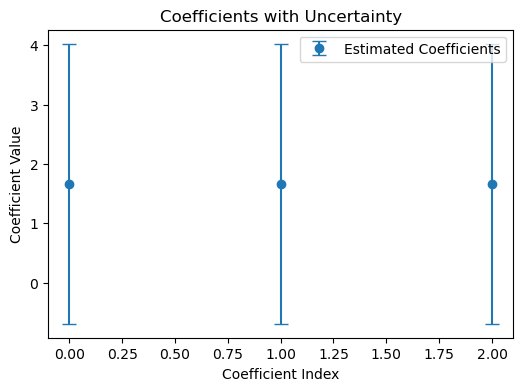

In [13]:
"""
Using BayesianRidge from scikit-learn
BayesianRidge is a Bayesian linear regression model that provides uncertainty estimates for the coefficients.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

# Sample data
data = {
    'Length1': [1, 2, 3, 4, 5],
    'Width': [2, 3, 4, 5, 6],
    'Height': [3, 4, 5, 6, 7],
    'Weight': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Design matrix and target variable
X = df[['Length1', 'Width', 'Height']]
y = df['Weight']

# Fit the Bayesian Ridge Regression model
model = BayesianRidge(compute_score=True)
model.fit(X, y)

# Print the coefficients and their standard deviations
print("Coefficients:", model.coef_)
print("Coefficient standard deviations:", np.sqrt(np.diag(model.sigma_)))

# Plot the true weights, estimated weights, and their uncertainties
plt.figure(figsize=(6,4))
plt.errorbar(range(len(model.coef_)), 
             model.coef_, 
             yerr=np.sqrt(np.diag(model.sigma_)), 
             fmt='o', capsize=5, label='Estimated Coefficients')
plt.title('Coefficients with Uncertainty')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()


Mean coefficients: [1.66166667 1.66166667 1.66166667]
Standard deviations of coefficients: [0.09115006 0.09115006 0.09115006]


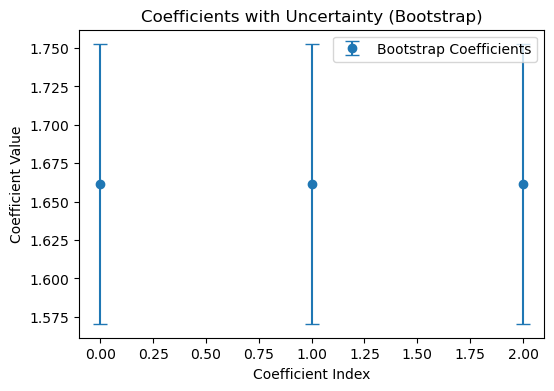

In [40]:
"""
Bootstrapping for Uncertainty Estimation
Bootstrapping is a resampling technique that can be used to estimate the uncertainty of the coefficients.
"""
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Sample data
data = {
    'Length1': [1, 2, 3, 4, 5],
    'Width': [2, 3, 4, 5, 6],
    'Height': [3, 4, 5, 6, 7],
    'Weight': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Design matrix and target variable
X = df[['Length1', 'Width', 'Height']]
y = df['Weight']

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Initialize arrays to store bootstrap estimates
bootstrap_coefs = np.zeros((n_bootstrap_samples, X.shape[1]))

# Perform bootstrapping
for i in range(n_bootstrap_samples):
    X_sample, y_sample = resample(X, y)
    model = LinearRegression()
    model.fit(X_sample, y_sample)
    bootstrap_coefs[i] = model.coef_

# Calculate mean and standard deviation of bootstrap estimates
mean_coefs = np.mean(bootstrap_coefs, axis=0)
std_coefs = np.std(bootstrap_coefs, axis=0)

print("Mean coefficients:", mean_coefs)
print("Standard deviations of coefficients:", std_coefs)

# Plot the bootstrap estimates
plt.figure(figsize=(6, 4))
plt.errorbar(range(len(mean_coefs)), mean_coefs, yerr=std_coefs, fmt='o', capsize=5, label='Bootstrap Coefficients')
plt.title('Coefficients with Uncertainty (Bootstrap)')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()


In [42]:
import numpy as np
import pandas as pd

# Sample data
data = {
    'Length': [1, 2, 3],
    'Width': [2, 3, 4]
}

df = pd.DataFrame(data)

# Add an intercept term (column of ones)
df['Intercept'] = 1

# Create the design matrix
X = df[['Intercept', 'Length', 'Width']]

# print("Design Matrix:\n", X)

Model coefficients: [0.20950153 0.5294286  0.39841419]
Variance of the residuals: 150.9224046839002
Covariance matrix of the coefficients:
 [[ 3.80621323 -0.15773098  0.2885645 ]
 [-0.15773098  3.93382621  0.76631224]
 [ 0.2885645   0.76631224  3.94916702]]


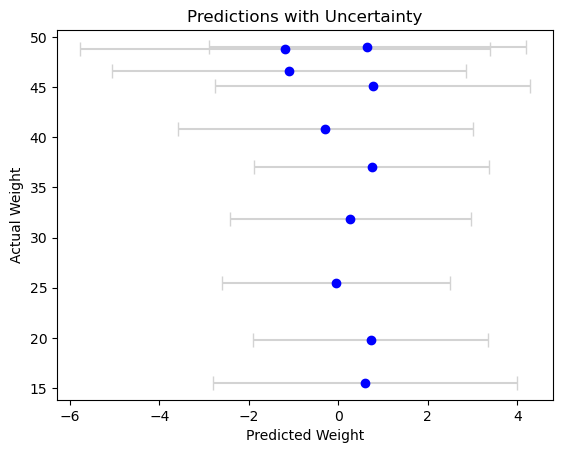

In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate more robust sample data (larger and less collinear)
np.random.seed(42)
n_samples = 50
data = {
    'Length1': np.random.uniform(1, 10, n_samples),
    'Width': np.random.uniform(2, 12, n_samples),
    'Height': np.random.uniform(3, 15, n_samples),
    'Weight': 2 * np.random.uniform(1, 10, n_samples) + 3 * np.random.uniform(2, 12, n_samples) + np.random.normal(0, 2, n_samples)
}

df = pd.DataFrame(data)

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Design matrix and target variable
X = np.array(train[['Length1', 'Width', 'Height']])
y = train['Weight']

# Normalize the design matrix to avoid numerical instability
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1  # Avoid division by zero
X_normalized = (X - X_mean) / X_std

# Fit the linear regression model
model = LinearRegression()
model.fit(X_normalized, y)

# Model coefficients
print("Model coefficients:", model.coef_)

# Calculate the variance of the residuals
y_pred = model.predict(X_normalized)
residuals = y - y_pred
sigma2 = np.sum(residuals**2) / (len(y) - X_normalized.shape[1] - 1)
print("Variance of the residuals:", sigma2)

# Calculate the inverse of X^T X with regularization to avoid singularity
X_T_X = np.dot(X_normalized.T, X_normalized)
reg_term = 1e-6 * np.eye(X_T_X.shape[0])  # Small regularization term
X_T_X_reg = X_T_X + reg_term
X_T_X_inv = np.linalg.inv(X_T_X_reg)

# Check for NaNs or Infs in the covariance matrix
cov_matrix = sigma2 * X_T_X_inv
if np.any(np.isnan(cov_matrix)) or np.any(np.isinf(cov_matrix)):
    raise ValueError("Covariance matrix contains NaNs or Infs. Try adjusting regularization or data.")

print("Covariance matrix of the coefficients:\n", cov_matrix)

# Generate multiple sets of coefficients from a multivariate normal distribution
num_samples = 1000
coefficients_samples = multivariate_normal.rvs(mean=model.coef_, cov=cov_matrix, size=num_samples)

# Use the generated coefficients to make predictions
X_test = np.array(test[['Length1', 'Width', 'Height']])
X_test_normalized = (X_test - X_mean) / X_std  # Normalize test data with training stats
y_pred_samples = np.dot(X_test_normalized, coefficients_samples.T)

# Calculate the mean and standard deviation of the predictions
y_pred_mean = np.mean(y_pred_samples, axis=1)
y_pred_std = np.std(y_pred_samples, axis=1)

# Plot the predictions with uncertainty
plt.errorbar(y_pred_mean, test['Weight'], xerr=y_pred_std, fmt='o', color='blue', ecolor='lightgray', capsize=5)
plt.xlabel('Predicted Weight')
plt.ylabel('Actual Weight')
plt.title('Predictions with Uncertainty')
plt.show()

#### Logarithm
logarithm, the exponent or power to which a base must be raised to yield a given number. 
Expressed mathematically, x is the logarithm of n to the base b if $b^x$ = n, in which case one 
writes: 
$$x = log_b n$$

For example, $2^3 = 8$; therefore, 3 is the logarithm of 8 to base 2, or $3 = log_2 8$


#### Salary, a Logarithm Example
If you are predicting salary from years of experience.
Doubling the “years of experience” might add $10,000.
This is linear in the log of the “years of experience”.
So feature engineer and create a column with the log of the years
of experience, and use that column instead.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated data
years_experience = np.array([1, 2, 4, 8, 16, 32])
salary = np.array([40000, 50000, 60000, 70000, 80000, 90000])

# Log transform
log_years_experience = np.log(years_experience)
# print(f"Log years_of_experience: {log_years_experience}")

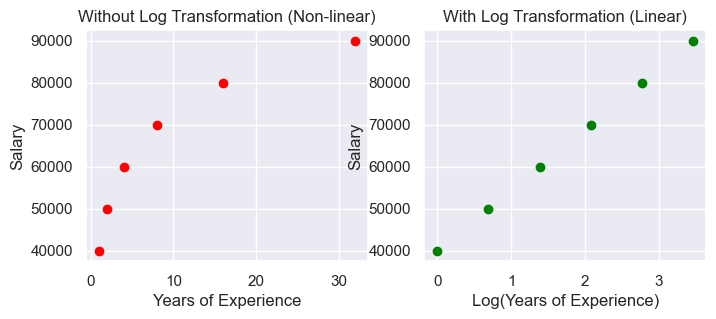

In [106]:
# Plot original relationship
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.scatter(years_experience, salary, color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Without Log Transformation (Non-linear)")

# Plot log-transformed relationship
plt.subplot(1,2,2)
plt.scatter(log_years_experience, salary, color='green')
plt.xlabel("Log(Years of Experience)")
plt.ylabel("Salary")
plt.title("With Log Transformation (Linear)")

plt.show()

#### import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample dataset
data = {'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Salary': [40000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000]}
print(data)

In [89]:
# Convert to DataFrame
df = pd.DataFrame(data)
# print(df)

# Feature engineering: add log-transformed experience column
df['Log_YearsExperience'] = np.log(df['YearsExperience'])

# Define features (using log of experience) and target
X = df[['Log_YearsExperience']]
# print(X)

y = df['Salary']
# print(y)

In [91]:
# Train a simple linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
# print(X_test)
# print(y_pred)

In [87]:
# Print model coefficient and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 35318.115224151945
Coefficient: 20669.251235270036


In [151]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared_score = r2_score(y_test, y_pred)
print(f"mae: {"{:.2f}".format(mae)}, mse: {"{:.2f}".format(mse)}, r_squared_score: {"{:.2f}".format(r_squared_score)}")

mae: 2310.97, mse: 9166239.93, r_squared_score: 0.97


#### Mean Absolute Error (MAE)

$$MAE = \frac{1}{n} \sum_{k=1}^n |y_i - \hat{y}_i|$$

- Measures the average absolute difference between the actual values (y_i) and predicted values (ŷ_i).
- Doesn’t penalize large errors as much as MSE.

#### Mean Squared Error (MSE)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

- Similar to MAE but squares the errors, making larger errors more impactful.

#### R Squared(Coefficient of Determination)

\begin{equation*}
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
\end{equation*}

Where:
- $y_i$  → Actual (observed) value of the dependent variable for the $i$-th data point.
- $\hat{y}_i$  → Predicted value from the model for the  $i$-th data point.
- $\bar{y}$  → Mean (average) of all actual values in the dataset.

Interpretation:
- It measures how well the model explains variance in the data.
- R² = 1 → Perfect model.
- R² = 0 → Model is as bad as predicting the mean.
- R² < 0 → Model is worse than just using the average.
- Example: If R² = 0.85, the model explains 85% of the variance in the target variable.


#### Loss Function

Logistic Loss Function (cross-entropy)

Logistic Regression: the goal is to use gradient descent to minimize cross-entropy

<pre>
TODO Further explain with coding example
</pre>